In [26]:
import nltk
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

Read the file and make bring data in proper format.

In [27]:
data=pd.read_csv('spam.csv',encoding='ISO-8859-1')

In [28]:
data=data.replace(np.nan, '', regex=True)

In [29]:
data['Text']=data['v2']+data['Unnamed: 2']+data['Unnamed: 3']+data['Unnamed: 4']

In [30]:
data = data.drop(['v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1)

Normalize the data set


In [31]:
data['Text']=[word.lower() for word in data['Text'] ]

VISUALIZATION

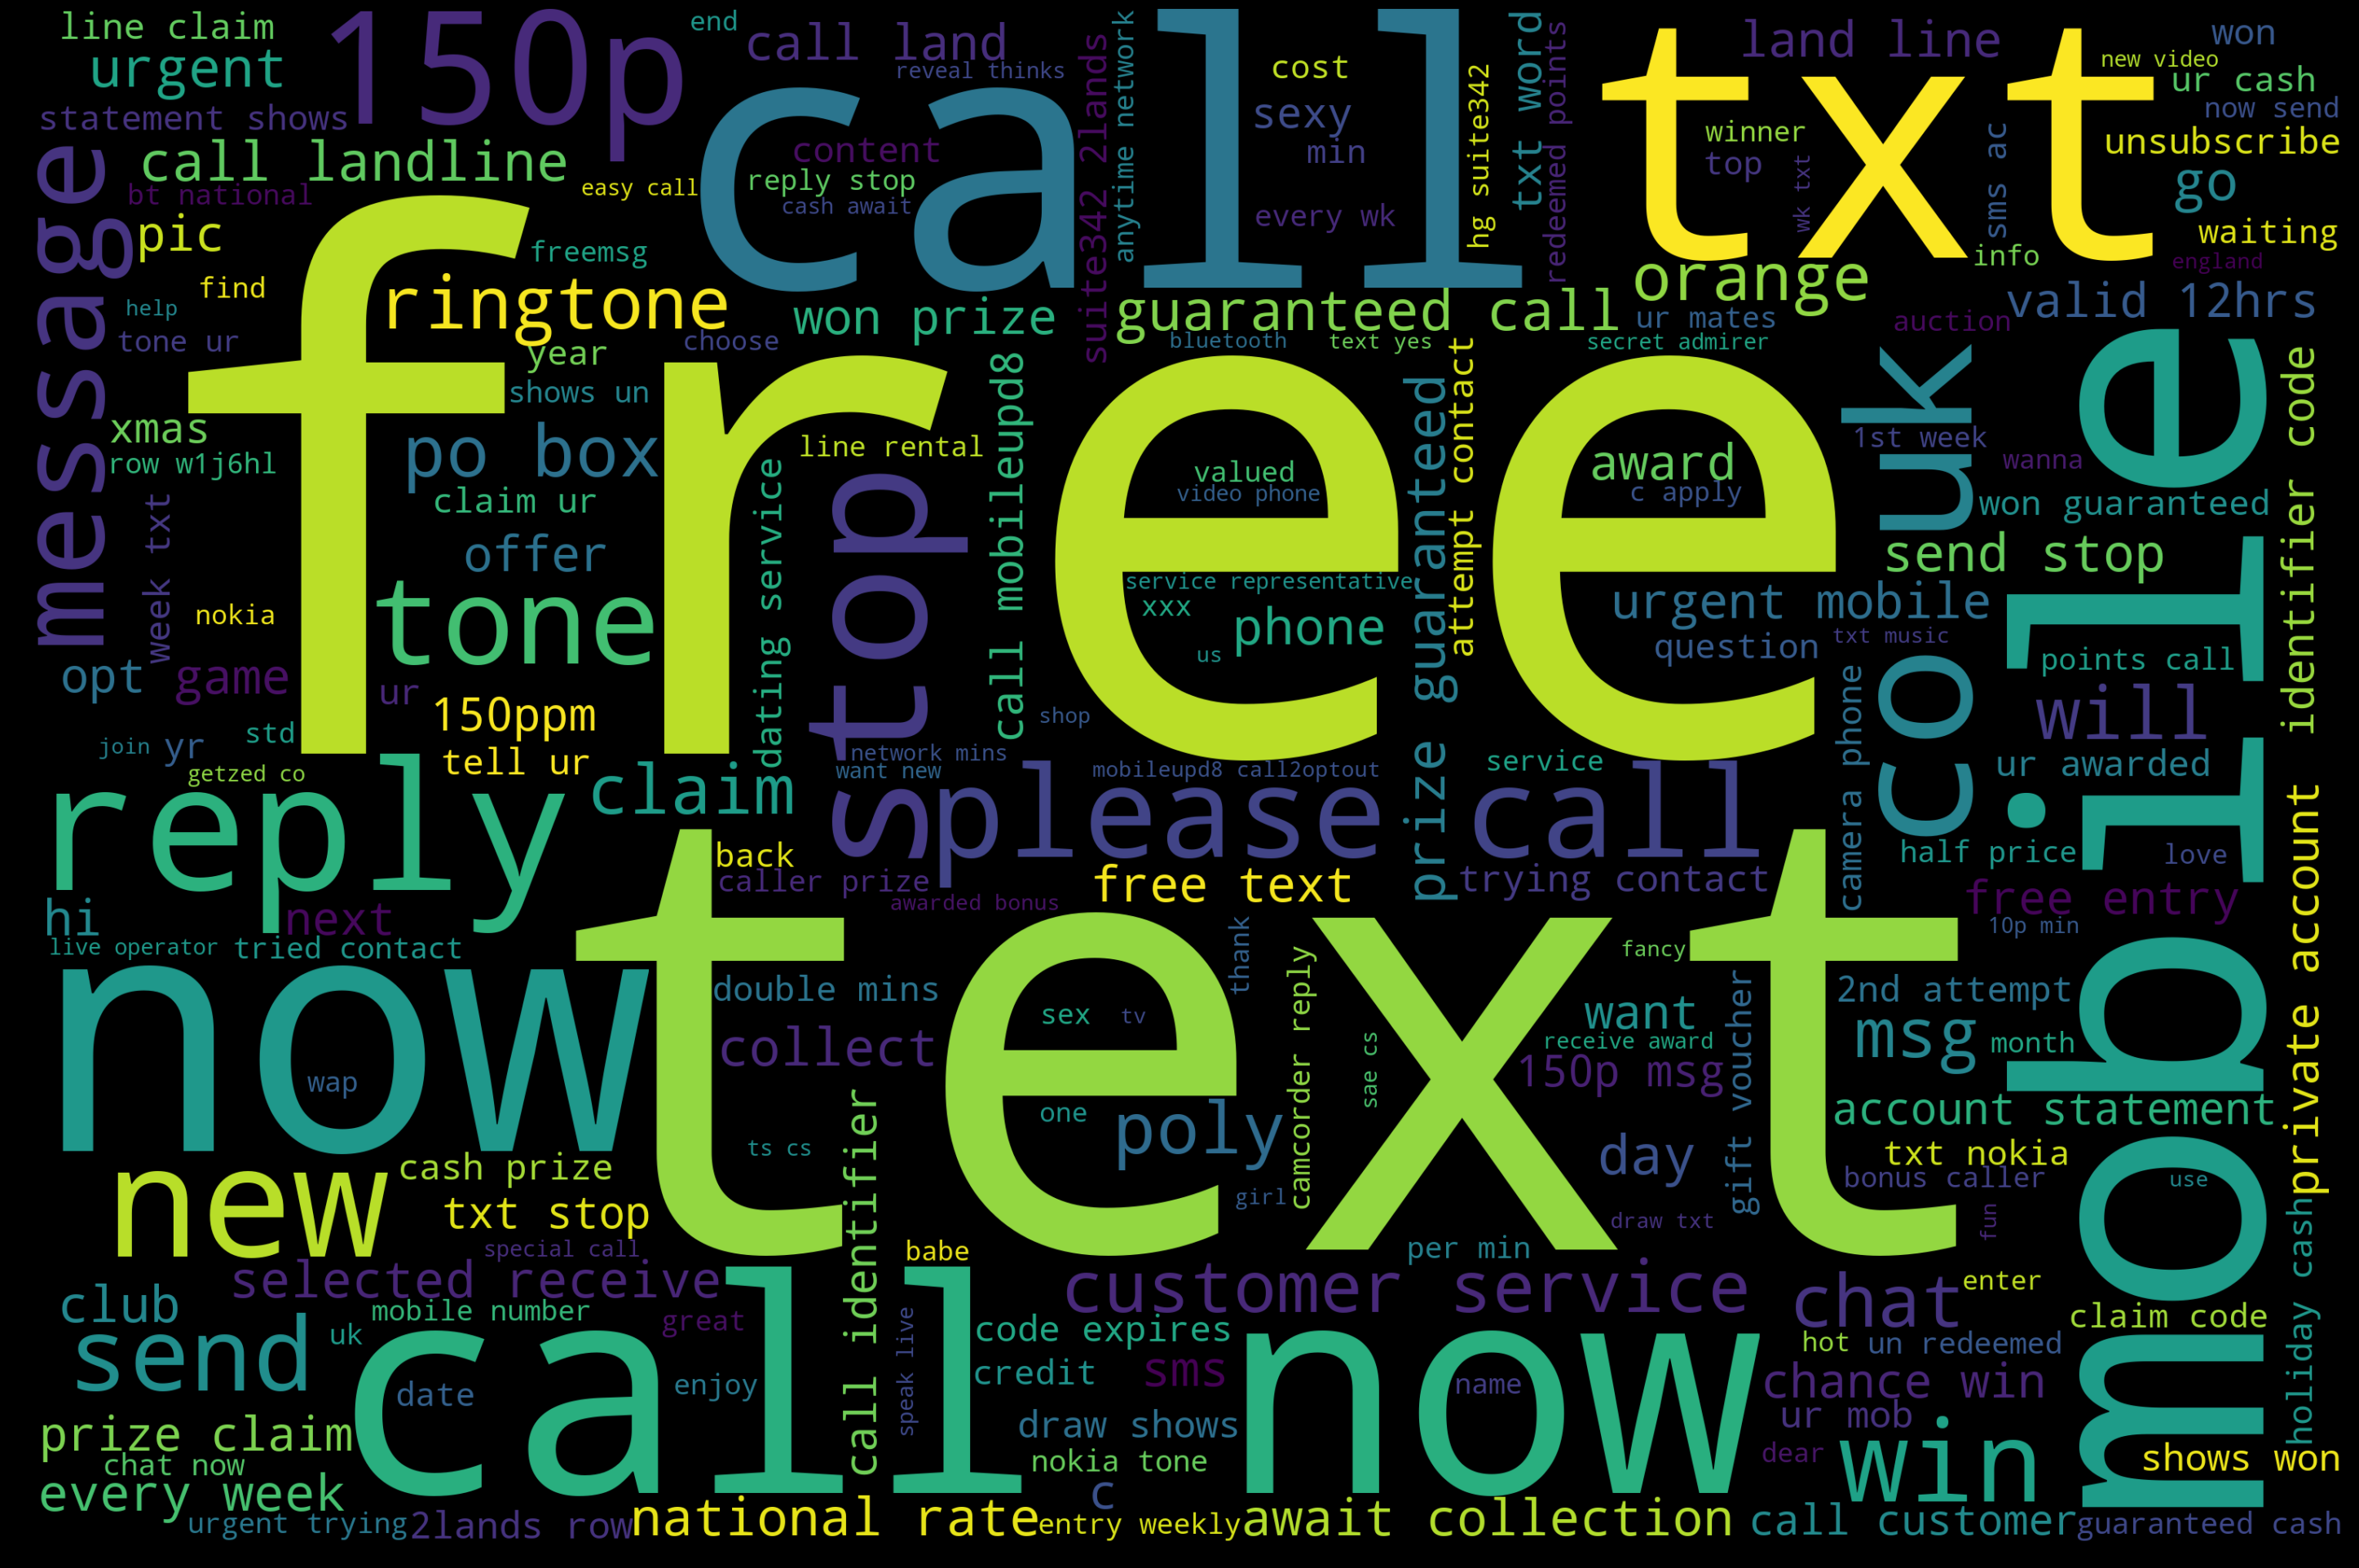

In [32]:
wordcloud2 =  WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(' '.join(data[data.v1 == 'spam']['Text']))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')

plt.imshow(wordcloud2, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

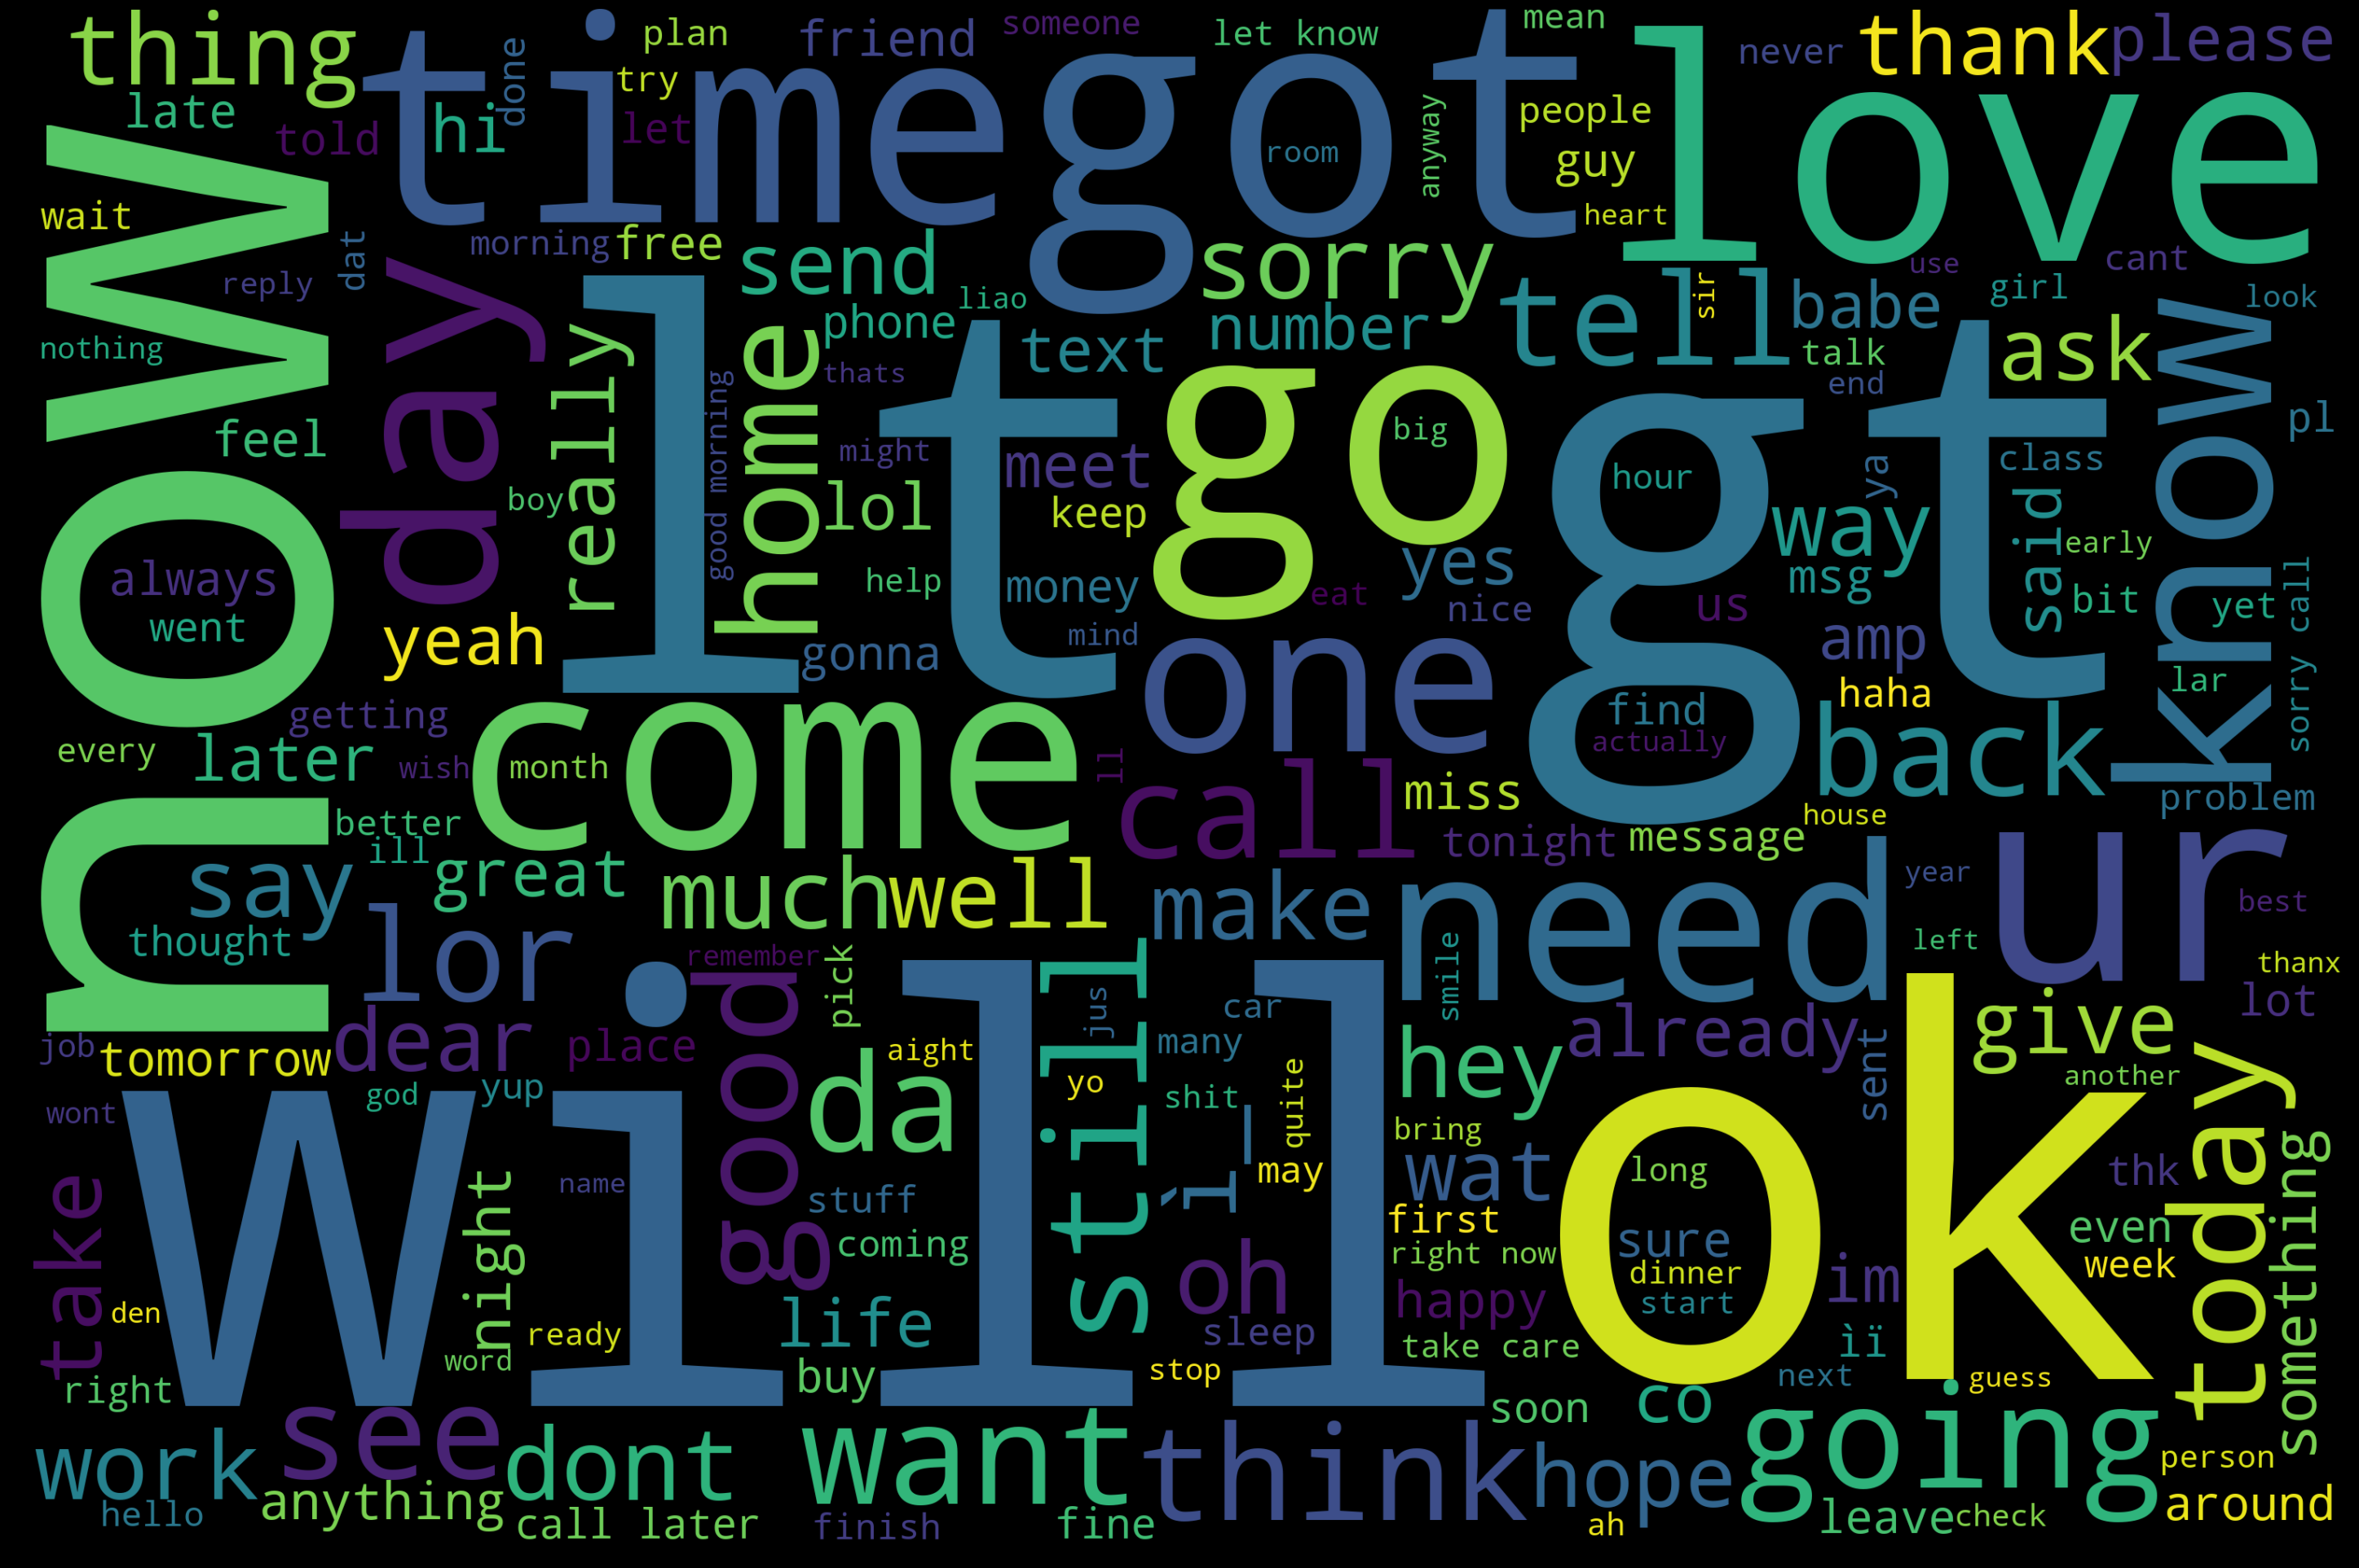

In [49]:
wordcloud2 =  WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(' '.join(data[data.v1 == 'ham']['Text']))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')

plt.imshow(wordcloud2, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Create word tokens 

In [33]:
data['tokens']=[nltk.word_tokenize(text) for text in data.loc[:,'Text']]

In [34]:

stop_words = set(stopwords.words('english'))

def stop_words_remover(l):
    fin=[]
    for word in l:
        if word not in stop_words:
            w = ''.join(e for e in word if e.isalnum())  # get rid of special characters
            fin.append(w)
    return fin

In [35]:
temp= [stop_words_remover(list) for list in data['tokens'] ]
data.loc[:,'tokens']=temp

Split data into train and test sets

In [36]:
train=data[:4000]
test=data[4000:]

Create a bag of words model

In [37]:
word_nature=[]
for i in range(len(train)):
    for word in train['tokens'][i]:
        word_nature.append((word,train['v1'][i]))

In [38]:
word_nature[:10]

[('go', 'ham'),
 ('jurong', 'ham'),
 ('point', 'ham'),
 ('', 'ham'),
 ('crazy', 'ham'),
 ('available', 'ham'),
 ('bugis', 'ham'),
 ('n', 'ham'),
 ('great', 'ham'),
 ('world', 'ham')]

In [39]:
spam_words=[word for word,classs in word_nature if classs=='spam' ]
ham_words=[word for word,classs in word_nature if classs=='ham' ]

Create the Bayes classification function:


In [40]:
def bayes_calc(email):
    spam_score=1
    ham_score=1
    
     # Get the ham and spam count in the entire data set.
    total_count = len(word_nature)
    ham_count  = sum([1 for k,v in word_nature if v=='ham' ])
    spam_count = sum([1 for k,v in word_nature if v=='spam' ])
    
    prob_ham  = ham_count  / total_count
    prob_spam = spam_count / total_count    

    for word in email:
    
        #get the probability of the occurance of the word
        word_count = sum([1 for k,v in word_nature if k==word ])
        prob_word = word_count/total_count
        
        if prob_word == 0:
            continue


        #conditional probability of the word being ham or spam
        prob_word_spam = sum([1 for k,v in word_nature if k==word and v=='spam'])/spam_count
        prob_word_ham  = sum([1 for k,v in word_nature if k==word and v=='ham'])/ham_count
       

        #conditional probability of the message being ham or spam given the word occured.We can ignore the denominator i.e.prob_word)
        if prob_word != 0:
            prob_spam_word = (prob_word_spam * prob_spam)
            prob_ham_word = (prob_word_ham * prob_ham)

            

            
        else:
            prob_spam_word = 1
            prob_ham_word = 1
        
        spam_score = spam_score * prob_spam_word
        ham_score = ham_score * prob_ham_word
        
    return spam_score > ham_score

In [59]:
bayes_calc('free text')

True

In [41]:
temp=[]
for email in test['tokens']:
    result=bayes_calc(email)
    if (result): 
        temp.append('spam') 
    else: 
        temp.append('ham')
    

In [42]:
test=test.reset_index()

In [43]:
len(test)

1572

In [44]:
test['accuracy']=([ test['v1'][i]==temp[i] for i in range(len(temp)) ])

In [45]:
(1 - (len(test) - sum(test['accuracy']))/len(test)) * 100

95.61068702290076

In [46]:
test['prediction'] = temp

In [47]:
test.head(100)

,index,v1,Text,tokens,accuracy,prediction
0,4000,ham,he's just gonna worry for nothing. and he won'...,"[s, gon, na, worry, nothing, , wo, nt, give, m...",True,ham
1,4001,ham,did you get any gift? this year i didnt get an...,"[get, gift, , year, didnt, get, anything, , bad]",True,ham
2,4002,ham,somewhere out there beneath the pale moon ligh...,"[somewhere, beneath, pale, moon, light, someon...",True,ham
3,4003,ham,well there's a pattern emerging of my friends ...,"[well, s, pattern, emerging, friends, telling,...",True,ham
4,4004,ham,", ow u dey.i paid 60,400thousad.i told u woul...","[, ow, u, deyi, paid, 60400thousadi, told, u, ...",True,ham
5,4005,ham,im fine babes aint been up 2 much tho! saw sca...,"[im, fine, babes, aint, 2, much, tho, , saw, s...",True,ham
6,4006,ham,i'm reaching home in 5 min.,"[m, reaching, home, 5, min, ]",True,ham
7,4007,ham,"forgot you were working today! wanna chat, but...","[forgot, working, today, , wan, na, chat, , th...",True,ham
8,4008,ham,ha... then we must walk to everywhere... canno...,"[ha, , must, walk, everywhere, , take, tram, ,...",True,ham
9,4009,spam,wan2 win a meet+greet with westlife 4 u or a m...,"[wan2, win, meetgreet, westlife, 4, u, m8, , c...",True,spam


In [48]:
test[['v1','Text','prediction','accuracy']].to_csv('result.csv')